In [ ]:
import disjointification
from disjointification import load_gene_expression_data, Disjointification
from pathlib import Path
from pprint import pprint
last_save_point = r"C:\github\feature_selection_on_gene_expression\model\06_01_2023__23_55_19\06_01_2023__23_57_55_(2999, 100).pkl"
load_last_save_point = True

In [2]:
if load_last_save_point:
    test = disjointification.from_file(last_save_point)
else:
    if 'labels_df' not in locals() or 'features_df' not in locals():
        labels_df, features_df = load_gene_expression_data()
    select_num_features = 100
    select_num_instances = 3000
    alert_selection = True
    debug_print = False

    test = Disjointification(features_file_path=None, labels_file_path=None, features_df=features_df, labels_df=labels_df, select_num_features=select_num_features, select_num_instances=select_num_instances)
    
print(f"test.features_df: {test.features_df.shape}")
print(f"test.test.labels_df: {test.labels_df.shape}")

test.features_df: (2999, 100)
test.test.labels_df: (2999, 2)


In [12]:
force_corr= False

if force_corr or test.features_selected_in_disjointification_lin is None or test.features_selected_in_disjointification_log is None:
    min_num_of_features = 50
    correlation_threshold = 0.4
    test.run_disjointification(min_num_of_features=min_num_of_features, correlation_threshold=correlation_threshold)

pprint(f"features selected in disjointification lin: \n{test.features_selected_in_disjointification_lin}")
pprint(f"features selected in disjointification log: \n{test.features_selected_in_disjointification_log}")

('features selected in disjointification lin: \n'
 "['F28', 'F33', 'F9', 'F54', 'F36', 'F31', 'F25', 'F74', 'F1', 'F32', 'F92', "
 "'F79', 'F73', 'F84', 'F82', 'F76', 'F42', 'F39', 'F48', 'F13', 'F49', 'F3', "
 "'F24', 'F99', 'F94', 'F37', 'F68', 'F86', 'F62', 'F61', 'F101', 'F100', "
 "'F63', 'F6', 'F30', 'F27', 'F67', 'F4', 'F93', 'F41', 'F14', 'F11', 'F66', "
 "'F43', 'F19', 'F52', 'F75', 'F38', 'F53', 'F102', 'F16', 'F95', 'F47', "
 "'F12', 'F50', 'F17', 'F89', 'F58', 'F70', 'F60', 'F65', 'F34', 'F64', 'F40', "
 "'F5', 'F87', 'F83', 'F69', 'F72', 'F71', 'F45', 'F81', 'F56', 'F90', 'F44', "
 "'F10', 'F2', 'F15', 'F78', 'F46', 'F91']")
('features selected in disjointification log: \n'
 "['F28', 'F33', 'F9', 'F54', 'F36', 'F31', 'F25', 'F74', 'F1', 'F32', 'F92', "
 "'F79', 'F73', 'F84', 'F82', 'F76', 'F42', 'F39', 'F48', 'F13', 'F49', 'F3', "
 "'F24', 'F99', 'F94', 'F37', 'F68', 'F86', 'F62', 'F61', 'F101', 'F100', "
 "'F63', 'F6', 'F30', 'F27', 'F67', 'F4', 'F93', 'F41', 'F14', 'F11'

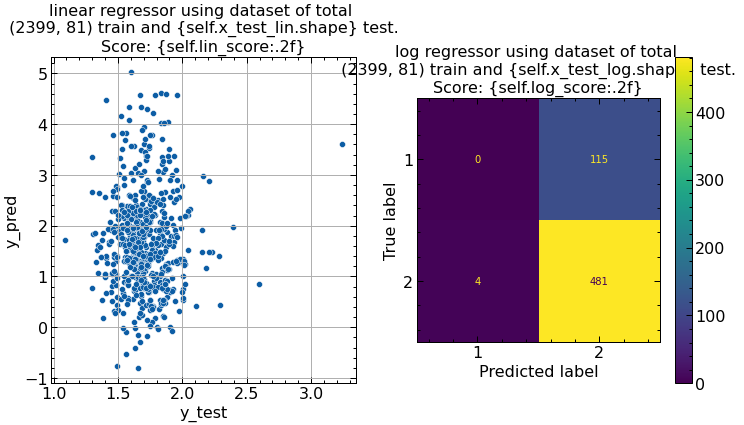

In [7]:
test.run_regressions()
test.show()

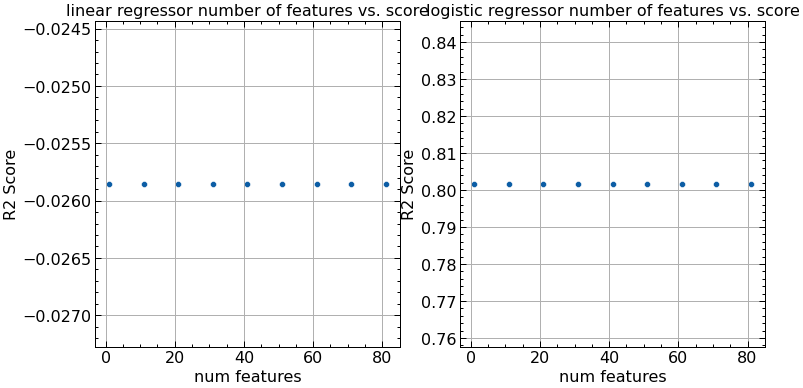

In [8]:
test.sweep_regression()
test.show_regressor_sweep()

In [ ]:
# TODOS

# VISUALIZE
# RANDOMFOR

In [ ]:
test.features_df[test.features_already_selected_lin].shape

## Meeting 24/05

- Disjointification should be done - 
- RF + Lasso benchmark
- Let's try OOB solutions - genetic?
- Propose other methods ? 
- RFE
- Can test another method that'll reduce to 500 and then do the same
